In [159]:
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [160]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [161]:
def init_params(dim, nodes, size_output_layer):
    b1 = np.zeros((nodes,1))
    w1 = np.random.randint(100, size = (nodes, dim)) * 0.01
    
    b2 = np.zeros((size_output_layer, 1))
    w2 = np.random.randint(100, size = (size_output_layer, nodes)) * 0.01
    
    params = {
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2
    }
    
    return params

In [162]:
def propagate_forward(x, params):
    
    w1 = params['w1']
    w2 = params['w2']
    b1 = params['b1']
    b2 = params['b2']
    
    Z1 = np.dot(w1, x) + b1
    A1 = np.tanh(Z1)    
    
    Z2 = np.dot(w2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {
            "Z1": Z1,
            "A1": A1,
            "A2": A2,
            "Z2": Z2,
           }
    return cache

In [163]:
def calc_cost(y, A2):
    
    m = y.shape[1]
    
    cost = -(1/m) * np.sum(np.dot(y, np.log(A2).T) + np.dot((1-y), (np.log(1-A2)).T))
    cost = float(np.squeeze(cost))
    return cost

In [164]:
def propagate_backwards(cache, params, y, x):
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    w1 = params['w1']
    w2 = params['w2']
    
    m = x.shape[1]
    
    dz2 = A2 - y
    
    dw2 = (1/m) * np.dot(dz2, A1.T)
    db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = np.multiply(np.dot(w2.T, dz2), (1-np.power(A1,2))) 
    
    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)
    
    grads = {
        "dw2": dw2,
        "db2": db2,
        "dw1": dw1,
        "db1": db1,
    }
    return grads


In [165]:
def update_params(grads, params, learning_rate):
    w2 = params['w2']
    b2 = params['b2']
    w1 = params['w1']
    b1 = params['b1']
    
    dw2 = grads['dw2']
    db2 = grads['db2']
    dw1 = grads['dw1']
    db1 = grads['db1']
    
    w2 = w2 - (learning_rate * dw2)
    b2 = b2 - (learning_rate * db2)
    
    w1 = w1 - (learning_rate * dw1)
    b1 = b1 - (learning_rate * db1)
    
    params = {
        'w2' : w2,
        'b2' : b2,
        'w1' : w1,
        'b1' : b1
    }
    return params

In [166]:
def nn_model(x_train, y_train, num_hidden_units, num_iterations, learning_rate = 0.01):
    np.random.seed(3)
    
    #Initialize parameters
    n_x = x_train.shape[0]
    n_h = num_hidden_units
    n_y = y_train.shape[0]
    
    params = init_params(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        #Forward Propagation
        cache = propagate_forward(x_train, params)
        #Calculate cost
        cost = calc_cost(y_train, cache['A2'])
        if(i % 1000 == 0):
            {
                print("Cost after iteration " + str(i) + ":" + " " + str(cost))
            }
        #Backward Propagation
        grads = propagate_backwards(cache, params, y_train, x_train)
        #Update parameters
        params = update_params(grads, params, learning_rate)        
    
    
    return params

In [167]:
def predict(x, params):
    
    cache = propagate_forward(x, params)
    predictions = (cache['A2'] >= 0.5)

    return predictions

In [168]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    y = y.reshape(y.shape[1])
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [169]:
def accuracy(predictions, y_test):
    x = (np.abs(predictions - y_test)).sum()
    acc = 100 - ((x/y_test.shape[1]) * 100)
    return str(acc) + "%"

In [209]:
#Creating random dataset
dataset = make_moons(noise=0.3, random_state=0)

X = dataset[0]
Y = dataset[1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4)

y_test = y_test.reshape(1, y_test.shape[0])
y_train = y_train.reshape(1, y_train.shape[0])

X_train = X_train.T
X_test = X_test.T

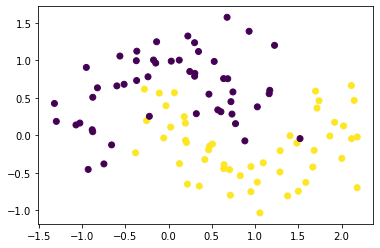

In [210]:
X, Y = dataset
X, Y = X.T, Y.reshape(Y.shape[0])

# Visualize the data
plt.scatter(X[0, :], X[1, :], c = Y);

In [211]:
params = nn_model(X_train, y_train, 5, 10000, 1.2)

Cost after iteration 0: 0.7531750209192234
Cost after iteration 1000: 0.009657375307833822
Cost after iteration 2000: 0.0029535406686967644
Cost after iteration 3000: 0.001638371802758041
Cost after iteration 4000: 0.0011099300686392935
Cost after iteration 5000: 0.0008306213518255164
Cost after iteration 6000: 0.0006596416923152808
Cost after iteration 7000: 0.0005449089000260608
Cost after iteration 8000: 0.00046291885058787925
Cost after iteration 9000: 0.00040157941885325145


In [212]:
predictions = predict(X_test, params)

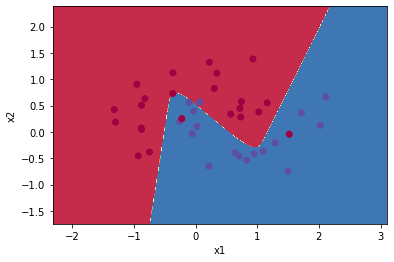

In [213]:
plot_decision_boundary(lambda x: predict(x.T, params), X_test, y_test)

In [214]:
accuracy(predictions, y_test)

'92.5%'